In [147]:
import sys
import cv2
sys.path.insert(1, '../../src/')
import matplotlib.pyplot as plt
from models.mediapipe.model import mediapipe_model

# Read image

In [2]:
640*1.5,960*1.5

(960.0, 1440.0)

(3024, 4032, 3)


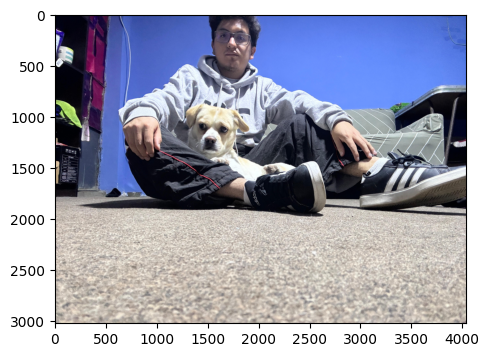

In [23]:
img     = cv2.imread("../../data/image_1.jpeg")
print(img.shape)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(8,4))
plt.imshow(img_rgb)
plt.show()

# Load model

    face_config = {
        'min_detection_confidence': 0.5,
        'min_tracking_confidence': 0.5,
        'max_num_faces': 1,
        'refine_landmarks':True
    }

    hands_config = {
        'min_detection_confidence': 0.3,
        'min_tracking_confidence': 0.3,
        'max_num_hands': 2,
        'model_complexity': 1
    }
                    
    pose_config = {
        'min_detection_confidence': 0.3,
        'min_tracking_confidence': 0.3,
        'model_complexity': 2,
        'smooth_landmarks':True,
        'enable_segmentation':False,
        'smooth_segmentation':True
    }

    model = mediapipe_model(models= ['hand', 'face', 'pose'], image_mode= True, 
                    face_config= face_config, hands_config=hands_config, pose_config=pose_config)

In [24]:
model = mediapipe_model()

I0000 00:00:1715139962.691281 3196369 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1715139962.692065 3210342 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
I0000 00:00:1715139962.706207 3196369 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1715139962.707129 3210357 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
I0000 00:00:1715139962.721282 3196369 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1715139962.722726 3210372 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)


In [47]:
results = model.predict(frame_rgb=img_rgb)

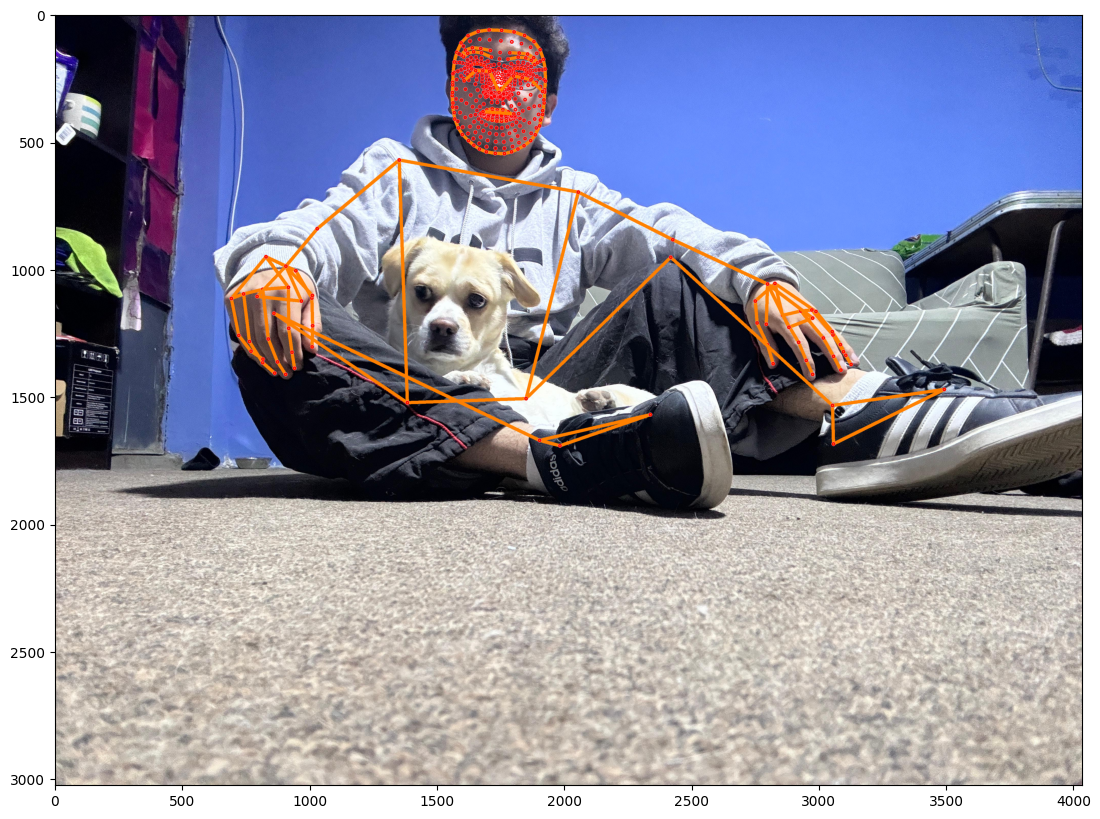

In [48]:
ldk_config = {
    'circle_radius':5,
    'thickness':4,
    'color':(255,0,0)
}
con_config = {
    'circle_radius':5,
    'thickness':12,
    'color':(255,128,0)
    #'color':(0,255,255)
}

img_rgb_new = model.draw_mediapipe(img_rgb,results,landmark_config=ldk_config,connection_config=con_config)
plt.figure(figsize=(20,10))
plt.imshow(img_rgb_new)
plt.show()

In [157]:
import numpy as np 

keypoints = np.array([[None,None] for i in range(133)])
scores    = np.array([None for i in range(133)])

print("keypoints:",len(keypoints))

def get_xy_landmarks(list_landmarks):
    list_points = []
    list_scores = []

    for idx, value in enumerate(list_landmarks.landmark):
        x,y,z = value.x,value.y,value.z

        if ((value.HasField('visibility') and
            value.visibility < model.mp_drawing._VISIBILITY_THRESHOLD) or
            (value.HasField('presence') and
            value.presence < model.mp_drawing._PRESENCE_THRESHOLD)):
            list_points.append([0,0])
            list_scores.append(0)
        else:
            list_points.append([x,y])
            list_scores.append(1)
    return list_points,list_scores


keypoints: 133


# Parsing HANDS

In [158]:
left_hand_landmarks = None
right_hand_landmarks = None
if results['hands'].multi_hand_landmarks is not None:
    left_hand_landmarks  = results['hands'].multi_hand_landmarks[0]
    if len(results['hands'].multi_hand_landmarks)==2:
        right_hand_landmarks = results['hands'].multi_hand_landmarks[1]

In [159]:
if left_hand_landmarks is not None:
    print(len(left_hand_landmarks.landmark))

21


In [160]:
if left_hand_landmarks is not None:
    keypoints[91:112],scores[91:112] = get_xy_landmarks(left_hand_landmarks)
if right_hand_landmarks is not None:
    keypoints[112:133],scores[112:133] = get_xy_landmarks(right_hand_landmarks)

In [161]:
hand_map_mp2coco = {
  "keypoint_id2coco_name": {
    "0": {
      "left": "left_hand_root",
      "right": "right_hand_root"
    },
    "1": {
      "left": "left_thumb1",
      "right": "right_thumb1"
    },
    "2": {
      "left": "left_thumb2",
      "right": "right_thumb2"
    },
    "3": {
      "left": "left_thumb3",
      "right": "right_thumb3"
    },
    "4": {
      "left": "left_thumb4",
      "right": "right_thumb4"
    },
    "5": {
      "left": "left_forefinger1",
      "right": "right_forefinger1"
    },
    "6": {
      "left": "left_forefinger2",
      "right": "right_forefinger2"
    },
    "7": {
      "left": "left_forefinger3",
      "right": "right_forefinger3"
    },
    "8": {
      "left": "left_forefinger4",
      "right": "right_forefinger4"
    },
    "9": {
      "left": "left_middle_finger1",
      "right": "right_middle_finger1"
    },
    "10": {
      "left": "left_middle_finger2",
      "right": "right_middle_finger2"
    },
    "11": {
      "left": "left_middle_finger3",
      "right": "right_middle_finger3"
    },
    "12": {
      "left": "left_middle_finger4",
      "right": "right_middle_finger4"
    },
    "13": {
      "left": "left_ring_finger1",
      "right": "right_ring_finger1"
    },
    "14": {
      "left": "left_ring_finger2",
      "right": "right_ring_finger2"
    },
    "15": {
      "left": "left_ring_finger3",
      "right": "right_ring_finger3"
    },
    "16": {
      "left": "left_ring_finger4",
      "right": "right_ring_finger4"
    },
    "17": {
      "left": "left_pinky_finger1",
      "right": "right_pinky_finger1"
    },
    "18": {
      "left": "left_pinky_finger2",
      "right": "right_pinky_finger2"
    },
    "19": {
      "left": "left_pinky_finger3",
      "right": "right_pinky_finger3"
    },
    "20": {
      "left": "left_pinky_finger4",
      "right": "right_pinky_finger4"
    }
  }
}

# Parsing POSE

In [162]:
if results['pose'].pose_landmarks != None:
    pose_landmarks = results['pose'].pose_landmarks
    print(len(pose_landmarks.landmark))

33


In [163]:
for i,landmark in enumerate(pose_landmarks.landmark):
    print(i,landmark.HasField('visibility'),landmark.visibility,"||",landmark.HasField('presence'),landmark.presence)

0 True 1.0 || False 0.0
1 True 1.0 || False 0.0
2 True 1.0 || False 0.0
3 True 1.0 || False 0.0
4 True 1.0 || False 0.0
5 True 1.0 || False 0.0
6 True 1.0 || False 0.0
7 True 0.9999998807907104 || False 0.0
8 True 1.0 || False 0.0
9 True 0.9999998807907104 || False 0.0
10 True 0.9999998807907104 || False 0.0
11 True 0.9999942779541016 || False 0.0
12 True 0.9999988079071045 || False 0.0
13 True 0.8772569298744202 || False 0.0
14 True 0.976325273513794 || False 0.0
15 True 0.9460421800613403 || False 0.0
16 True 0.9966726303100586 || False 0.0
17 True 0.9609054923057556 || False 0.0
18 True 0.9969314336776733 || False 0.0
19 True 0.964729905128479 || False 0.0
20 True 0.9972931742668152 || False 0.0
21 True 0.960489809513092 || False 0.0
22 True 0.9963763356208801 || False 0.0
23 True 0.999948263168335 || False 0.0
24 True 0.999966025352478 || False 0.0
25 True 0.9805120229721069 || False 0.0
26 True 0.9981436729431152 || False 0.0
27 True 0.9736760854721069 || False 0.0
28 True 0.91551

In [164]:
pose_map_mp2coco = {
    "keypoint_id2coco_name": {
        "0": "nose",
        "2": "left_eye",
        "5": "right_eye",
        "7": "left_ear",
        "8": "right_ear",
        "11": "left_shoulder",
        "12": "right_shoulder",
        "13": "left_elbow",
        "14": "right_elbow",
        "15": "left_wrist",
        "16": "right_wrist",
        "23": "left_hip",
        "24": "right_hip",
        "25": "left_knee",
        "26": "right_knee",
        "27": ["left_ankle","left_heel"],
        "28": ["right_ankle","right_heel"],
        "29": "left_big_toe",
        "30": "right_big_toe",
        "31": "left_small_toe",
        "32": "right_small_toe"
    },
    
    "keypoint_mp2coco_id": {
        "0": 0,
        "2": 1,
        "5": 2,
        "7": 3,
        "8": 4,
        "11": 5,
        "12": 6,
        "13": 7,
        "14": 8,
        "15": 9,
        "16": 10,
        "23": 11,
        "24": 12,
        "25": 13,
        "26": 14,
        "27": [15,19],
        "28": [16,22],
        "29": 17,
        "30": 20,
        "31": 18,
        "32": 21
    }
}

In [165]:
if pose_landmarks is not None:
    keypoints_pose,scores_pose = get_xy_landmarks(pose_landmarks)

In [171]:
for i in range(len(keypoints_pose)):
    if str(i) in pose_map_mp2coco['keypoint_mp2coco_id']:
        id = pose_map_mp2coco['keypoint_mp2coco_id'][str(i)]
        if type(id) is list:
            for j in id:
                keypoints[j] = keypoints_pose[i]
                scores[j] = scores_pose[i]
        else:
            keypoints[id] = keypoints_pose[i]
            scores[id] = scores_pose[i]


# Parsing Face

In [173]:
if results['face'].multi_face_landmarks != None:
    faces_landmarks = results['face'].multi_face_landmarks
    for face_landmark in faces_landmarks:
        print(len(face_landmark.landmark))

468


In [174]:
len(faces_landmarks)

1

In [175]:
face_landmark.landmark

[x: 0.43075597286224365
y: 0.12317071110010147
z: -0.013145689852535725
, x: 0.43062061071395874
y: 0.10109086334705353
z: -0.02067544497549534
, x: 0.4306528866291046
y: 0.10894359648227692
z: -0.012086614035069942
, x: 0.4282286465167999
y: 0.08180797845125198
z: -0.013612397015094757
, x: 0.4308311641216278
y: 0.09465307742357254
z: -0.021410226821899414
, x: 0.4311707615852356
y: 0.08705111593008041
z: -0.019129283726215363
, x: 0.432079553604126
y: 0.06976321339607239
z: -0.006673802156001329
, x: 0.4041721820831299
y: 0.06886498630046844
z: 0.008676582016050816
, x: 0.4328911304473877
y: 0.05688457936048508
z: -0.0022489556577056646
, x: 0.433320015668869
y: 0.04874729365110397
z: -0.0019133276073262095
, x: 0.4347931444644928
y: 0.019945748150348663
z: 0.005927443969994783
, x: 0.4307611286640167
y: 0.126030832529068
z: -0.01280601043254137
, x: 0.4307156801223755
y: 0.12821830809116364
z: -0.011759159155189991
, x: 0.43071556091308594
y: 0.12912483513355255
z: -0.01030905451625